In [9]:
import torch

torch.cuda.is_available()

True

In [12]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import json

In [ ]:
data_path = 'arc2025_data/'

def load_json(file_path: str):
    with open(file_path) as f:
        data = json.load(f)
    return data

training_challenges = load_json(data_path + 'arc-agi_training_challenges.json')
training_solutions = load_json(data_path + 'arc-agi_training_solutions.json')

evaluation_challenges = load_json(data_path + 'arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(data_path + 'arc-agi_evaluation_solutions.json')

In [13]:
color = "#55ffbb"

cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00', '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

#12, 21897d95


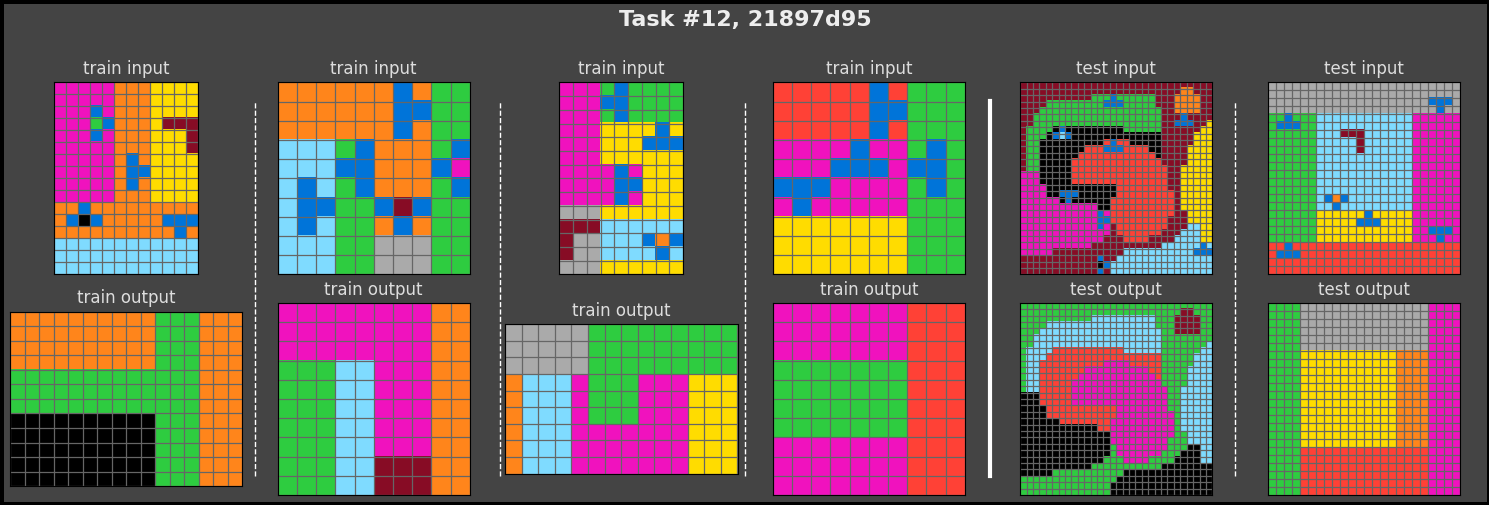

In [17]:
# Code from: https://www.kaggle.com/code/allegich/arc-feature-extraction-statistical-exploration

def plot_task(task, task_solutions, i, t, size=2.5, w1=0.9):
    title_size = 16
    num_train = len(task['train'])
    num_test = len(task['test'])

    wn = num_test + num_train
    fig, axs = plt.subplots(2, wn, figsize=(size * wn, 2 * size))
    plt.suptitle(f'Task #{i}, {t}', fontsize=title_size, fontweight='bold', y=1, color='#eeeeee')

    for j in range(num_train):
        plot_one(axs[0, j], j, task, 'train', 'input', w=w1)
        plot_one(axs[1, j], j, task, 'train', 'output', w=w1)

    for k in range(num_test):
        plot_one(axs[0, j+k+1], k, task, 'test', 'input', w=w1)
        task['test'][k]['output'] = task_solutions[k]
        plot_one(axs[1, j+k+1], k, task, 'test', 'output', w=w1)

    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, wn])

    colorSeparator = 'white'
    for m in range(1, wn):
        axs[1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = colorSeparator)
    axs[1, j+1].plot([num_train,num_train],[0,1],'-', linewidth=3, color = colorSeparator)

    axs[1, j+1].axis("off")

    fig.patch.set_linewidth(5) #widthframe
    fig.patch.set_edgecolor('black') #colorframe
    fig.patch.set_facecolor('#444444') #background
   
    plt.tight_layout()
    
    print(f'#{i}, {t}') # for fast and convinience search
    plt.show()

def plot_one(ax, i, task, train_or_test, input_or_output, solution=None, w=0.8):
    fs=12
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    
    #ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 1.0)
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    
    '''Grid:'''
    ax.grid(visible= True, which = 'both', color = '#666666', linewidth = w)
    
    ax.tick_params(axis='both', color='none', length=0)
   
    '''sub title:'''
    ax.set_title(train_or_test + ' ' + input_or_output, fontsize=fs, color = '#dddddd')

i = 12
t = list(evaluation_challenges)[i]
task = evaluation_challenges[t]
task_solution = evaluation_solutions[t]
plot_task(task, task_solution, i, t, 2.5, 0.9)